In [26]:
import numpy as np
import matplotlib.pyplot as plt
import time
import warnings

warnings.filterwarnings('ignore')

print("Defining objective functions...")

def F1(w): 
    x, y = w[0], w[1]
    if abs(x) > 1e4 or abs(y) > 1e4: return np.inf, np.zeros_like(w)
    
    v = (1 - x)**2 + 100 * (y - x**2)**2
    dx = -2 * (1 - x) - 400 * x * (y - x**2)
    dy = 200 * (y - x**2)
    return v, np.array([dx, dy])

def F2(w):
    x = w[0]
    if abs(x) < 1e-4: return 0.0, np.array([0.0])
    v = np.sin(1/x)
    dx = np.cos(1/x) * (-1/(x**2))
    return v, np.array([dx])

print("Functions defined.")

Defining objective functions...
Functions defined.


In [27]:
print("Initializing optimizers...")

class Opt:
    def __init__(self, k, lr):
        self.k = k
        self.lr = lr
        self.m = None
        self.v = None
        self.t = 0
        
    def step(self, w, g):
        g = np.clip(g, -5.0, 5.0)
        
        if self.m is None: 
            self.m = np.zeros_like(w)
            self.v = np.zeros_like(w)
        
        if self.k == 'GD':
            return w - self.lr * g
            
        if self.k == 'Mom':
            self.v = 0.9 * self.v + self.lr * g
            return w - self.v
            
        if self.k == 'Ada':
            self.v += g**2
            return w - (self.lr / (np.sqrt(self.v) + 1e-8)) * g
            
        if self.k == 'RMS':
            self.v = 0.9 * self.v + 0.1 * (g**2)
            return w - (self.lr / (np.sqrt(self.v) + 1e-8)) * g
            
        if self.k == 'Adam':
            self.t += 1
            self.m = 0.9 * self.m + 0.1 * g
            self.v = 0.999 * self.v + 0.001 * (g**2)
            mh = self.m / (1 - 0.9**self.t)
            vh = self.v / (1 - 0.999**self.t)
            return w - self.lr * mh / (np.sqrt(vh) + 1e-8)

print("Optimizer class ready (with Clipping).")

Initializing optimizers...
Optimizer class ready (with Clipping).


In [28]:
lrs = [0.01, 0.05, 0.1]
opts = ['GD', 'Mom', 'Ada', 'RMS', 'Adam']
fns = [
    ('Rosenbrock', F1, np.array([-1.0, -0.5]), 2000), 
    ('Sin(1/x)', F2, np.array([0.5]), 1000)
]

Res = {}

print("Starting training loops...")

for fn_name, fn, w0, ep in fns:
    print(f"--> Optimizing {fn_name}")
    Res[fn_name] = {}
    
    for lr in lrs:
        Res[fn_name][lr] = {}
        for o_name in opts:
            w = w0.copy()
            o = Opt(o_name, lr)
            H = []
            
            t0 = time.time()
            for _ in range(ep):
                val, grad = fn(w)
                if val == np.inf or np.isnan(val): break
                
                H.append(val)
                w = o.step(w, grad)
            
            dt = time.time() - t0
            
            final_v = H[-1] if len(H) > 0 else float('inf')
            Res[fn_name][lr][o_name] = {
                'w': w, 'v': final_v, 't': dt, 'H': H
            }

print("Training complete.")

Starting training loops...
--> Optimizing Rosenbrock
--> Optimizing Sin(1/x)
Training complete.


Generating Plots and Tables...

=== Results for Rosenbrock ===


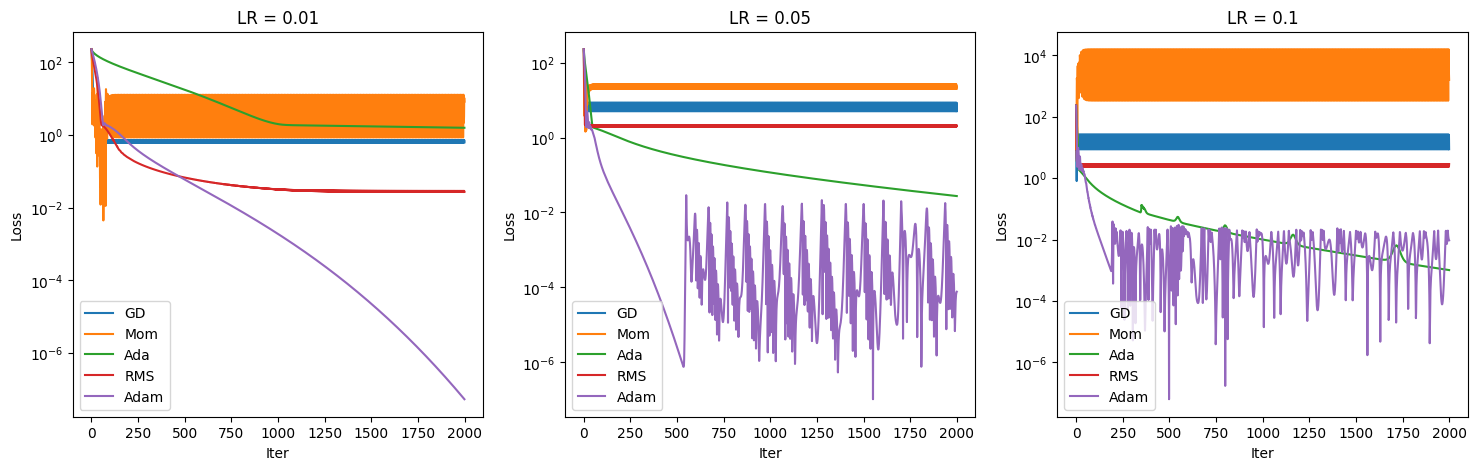

LR     Opt        Time(s)    Final Val    Final X
------------------------------------------------------------
0.01   GD         0.0322     6.24e-01    [0.2905 0.0377]
0.01   Mom        0.0196     8.24e+00    [1.0991 1.1163]
0.01   Ada        0.0262     1.57e+00    [-0.2536  0.0692]
0.01   RMS        0.0237     2.70e-02    [0.9057 0.8345]
0.01   Adam       0.0283     5.28e-08    [0.9998 0.9995]
0.05   GD         0.0124     5.08e+00    [-0.5  0. ]
0.05   Mom        0.0172     2.02e+01    [-1.2814  1.178 ]
0.05   Ada        0.0165     2.74e-02    [0.8346 0.6959]
0.05   RMS        0.0117     2.10e+00    [-0.3776  0.1158]
0.05   Adam       0.0249     7.64e-05    [0.9977 0.9963]
0.1    GD         0.0087     8.71e+00    [0.04 0.5 ]
0.1    Mom        0.0081     1.58e+03    [ 2.9101 15.5899]
0.1    Ada        0.0182     1.01e-03    [0.9682 0.9374]
0.1    RMS        0.0277     2.84e+00    [-0.4017  0.0983]
0.1    Adam       0.0480     9.38e-03    [0.9886 0.987 ]

=== Results for Sin(1/x) ===


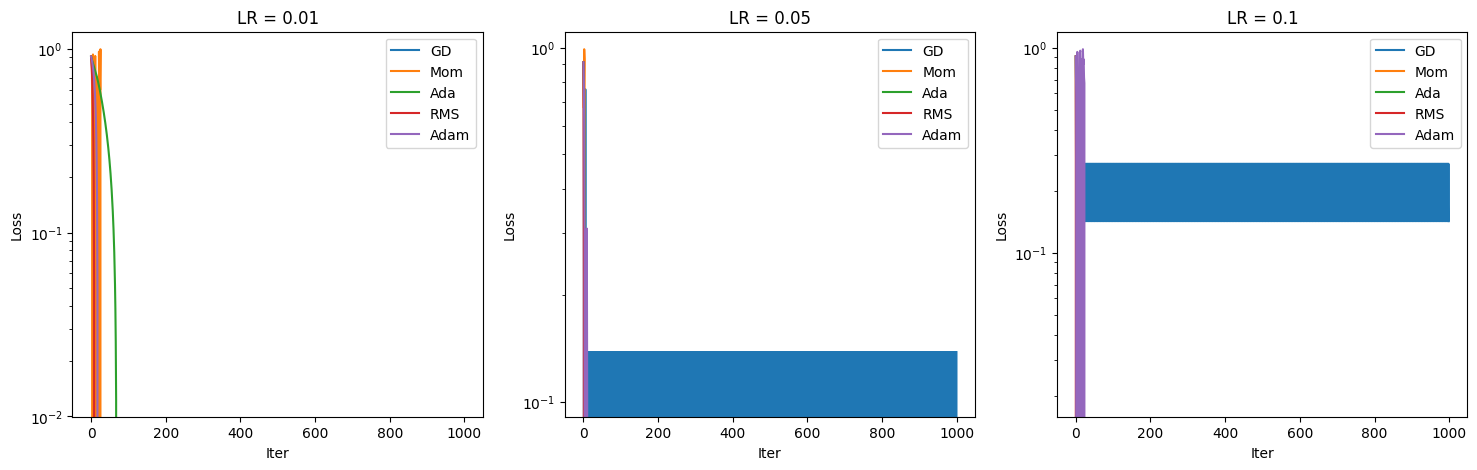

LR     Opt        Time(s)    Final Val    Final X
------------------------------------------------------------
0.01   GD         0.0139     -7.46e-01    [0.2011]
0.01   Mom        0.0301     -1.00e+00    [-0.6366]
0.01   Ada        0.0308     -1.00e+00    [0.2122]
0.01   RMS        0.0188     -9.93e-01    [0.2076]
0.01   Adam       0.0127     -1.00e+00    [0.2122]
0.05   GD         0.0000     1.38e-01    [0.2727]
0.05   Mom        0.0103     -1.00e+00    [-0.6366]
0.05   Ada        0.0073     -1.00e+00    [0.2122]
0.05   RMS        0.0096     -9.63e-01    [0.1752]
0.05   Adam       0.0060     -1.00e+00    [0.2122]
0.1    GD         0.0086     1.43e-01    [-0.1665]
0.1    Mom        0.0025     -1.00e+00    [-0.6366]
0.1    Ada        0.0059     -1.00e+00    [0.2122]
0.1    RMS        0.0121     -2.36e-01    [0.1958]
0.1    Adam       0.0114     -9.96e-01    [0.208]


In [29]:
print("Generating Plots and Tables...")

for fn_name in Res:
    print(f"\n=== Results for {fn_name} ===")
    
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    for i, lr in enumerate(lrs):
        ax = axs[i]
        for o_name in opts:
            h = Res[fn_name][lr][o_name]['H']
            if len(h) > 0:
                ax.plot(h, label=o_name)
        ax.set_title(f"LR = {lr}")
        ax.set_yscale('log')
        ax.set_xlabel('Iter')
        ax.set_ylabel('Loss')
        ax.legend()
    plt.show()
    
    # Table
    print(f"{'LR':<6} {'Opt':<10} {'Time(s)':<10} {'Final Val':<12} {'Final X'}")
    print("-" * 60)
    for lr in lrs:
        for o in opts:
            d = Res[fn_name][lr][o]
            fx = np.array2string(d['w'], precision=4)
            print(f"{lr:<6} {o:<10} {d['t']:.4f}     {d['v']:.2e}    {fx}")